In [1]:
import sys
sys.path.insert(0,"/home/shackste/galaxy-generator/python_modules/")

import matplotlib.pyplot as plt

plt.style.use('dark_background')

from pdb import set_trace

# Classifier

In [2]:
from image_classifier import ImageClassifier
from accuracy_measures import measure_accuracy_classifier
from loss import get_sample_variance, loss_sample_variance


!!!!!!!!!!

galaxyzoo_data_cropped_nonnormalized.npy and training_solutions_rev1.csv must be placed in google drive under galaxy-generator/data/
the results will be placed there, too.



/home/shackste/galaxy-generator/python_modules/accuracy_measures.py:82: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if prediction is 0:
/home/shackste/galaxy-generator/python_modules/accuracy_measures.py:92: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if prediction is 0:


# Training

In [3]:
import torch 
from torch.optim import SGD

from dataset import MakeDataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

optimizer = SGD
optimizer_kwargs = {"nesterov":True, "momentum":0.9}
learning_rate_init = 0.04
gamma = 0.995 # learning rate decay factor
sample_variance_threshold = 0.002
seed_parameter = 7

weight_loss_sample_variance = 0 # 10.

epochs = 1000 #500 #100  #  433 epochs done by Dielemann et al. 2015

batch_size = 32

epochs = 500

make_data_loader = MakeDataLoader()
classifier = ImageClassifier(seed=seed_parameter,
                             gamma=gamma,
                             sample_variance_threshold=sample_variance_threshold, 
                             optimizer=optimizer,
                             considered_groups=list(range(1,8)),
                             optimizer_kwargs=optimizer_kwargs, 
                             learning_rate_init=learning_rate_init,
                             weight_loss_sample_variance=weight_loss_sample_variance
                            ).to(device)

#classifier.load()
#classifier.use_label_hierarchy()

schedule = {
    # epoch : performed change
    2 : classifier.use_label_hierarchy,
}



In [4]:
print(device)
torch.cuda.is_available(), classifier.make_labels_hierarchical, classifier.considered_groups
#data_loader_train.num_workers


cuda


(True, False, <labeling.ConsiderGroups at 0x7f43e0f39d30>)

epoch 0:   0%|          | 0/1731 [00:00<?, ?it/s]/home/shackste/anaconda3/envs/pytorch/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448278899/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
epoch 0:   0%|          | 1/1731 [00:00<25:54,  1.11it/s]

target		 tensor([0.6050, 0.3770, 0.0180, 0.0000, 0.3770, 0.0000, 0.3770, 0.2740, 0.1030,
        0.3770, 0.0000, 0.0000, 0.0000, 0.3400, 0.6600, 0.4710, 0.1340, 0.0000])
prediction	 tensor([0.0050, 0.0300, 0.0220, 0.0000, 0.0000, 0.0000, 0.0000, 0.0010, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0140, 0.0000, 0.0000, 0.0110, 0.0260, 0.0000])
target		 tensor([0.0590, 0.9330, 0.0070, 0.0880, 0.8450, 0.0740, 0.7700, 0.8450, 0.0000,
        0.0000, 0.4060, 0.3180, 0.1200, 0.5250, 0.4750, 0.0000, 0.0000, 0.0590])
prediction	 tensor([0.0060, 0.0320, 0.0210, 0.0000, 0.0000, 0.0000, 0.0000, 0.0010, 0.0000,
        0.0000, 0.0020, 0.0000, 0.0160, 0.0000, 0.0000, 0.0110, 0.0240, 0.0000])
target		 tensor([0.2410, 0.7590, 0.0000, 0.0000, 0.7590, 0.0540, 0.7060, 0.4760, 0.2830,
        0.1940, 0.3320, 0.0470, 0.1860, 0.1990, 0.8010, 0.0000, 0.2410, 0.0000])
prediction	 tensor([0.0040, 0.0290, 0.0180, 0.0000, 0.0000, 0.0000, 0.0000, 0.0010, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0150, 0.0000, 0.00

epoch 0:  15%|█▍        | 251/1731 [01:20<09:27,  2.61it/s]

target		 tensor([0.0000, 1.0000, 0.0000, 0.0360, 0.9640, 0.0960, 0.8680, 0.9190, 0.0450,
        0.0460, 0.7140, 0.2040, 0.0000, 0.0610, 0.9390, 0.0000, 0.0000, 0.0000])
prediction	 tensor([0.0050, 0.7950, 0.0010, 0.1690, 0.6560, 0.0030, 0.5430, 0.0030, 0.0040,
        0.0020, 0.0030, 0.0020, 0.0010, 0.0040, 0.9130, 0.0030, 0.0040, 0.0020])
target		 tensor([0.3080, 0.6810, 0.0110, 0.0000, 0.6810, 0.0530, 0.6280, 0.5490, 0.1320,
        0.1080, 0.3960, 0.1770, 0.0000, 0.0410, 0.9590, 0.0200, 0.2880, 0.0000])
prediction	 tensor([0.4280, 0.2240, 0.0910, 0.3130, 0.1720, 0.0670, 0.1710, 0.1210, 0.1400,
        0.0720, 0.0970, 0.0570, 0.0670, 0.2520, 0.4100, 0.1400, 0.2360, 0.0570])
target		 tensor([0.0540, 0.9460, 0.0000, 0.1010, 0.8450, 0.2730, 0.5720, 0.7730, 0.0720,
        0.0140, 0.2730, 0.5570, 0.0000, 0.0330, 0.9670, 0.0030, 0.0320, 0.0180])
prediction	 tensor([0.0050, 0.4770, 0.0020, 0.1720, 0.2670, 0.0020, 0.2540, 0.0020, 0.0030,
        0.0010, 0.0020, 0.0020, 0.0010, 0.0030, 0.87

epoch 0:  29%|██▉       | 501/1731 [02:44<08:23,  2.44it/s]

target		 tensor([0.8460, 0.1340, 0.0200, 0.0000, 0.1340, 0.0000, 0.1340, 0.0000, 0.1340,
        0.0000, 0.0380, 0.0770, 0.0190, 0.0850, 0.9150, 0.6690, 0.1770, 0.0000])
prediction	 tensor([0.0070, 0.1450, 0.0020, 0.0160, 0.1280, 0.0040, 0.1100, 0.0040, 0.0040,
        0.0020, 0.0050, 0.0030, 0.0020, 0.0040, 0.9340, 0.0040, 0.0040, 0.0020])
target		 tensor([0.7510, 0.2000, 0.0500, 0.0000, 0.2000, 0.0000, 0.2000, 0.0000, 0.2000,
        0.0000, 0.0000, 0.2000, 0.0000, 0.0440, 0.9560, 0.0690, 0.6810, 0.0000])
prediction	 tensor([0.0070, 0.4110, 0.0020, 0.1740, 0.2800, 0.0030, 0.2150, 0.0040, 0.0040,
        0.0020, 0.0050, 0.0030, 0.0020, 0.0040, 0.9580, 0.0030, 0.0040, 0.0020])
target		 tensor([0.8770, 0.0850, 0.0380, 0.0000, 0.0850, 0.0000, 0.0850, 0.0000, 0.0850,
        0.0000, 0.0460, 0.0270, 0.0120, 0.0650, 0.9350, 0.8350, 0.0420, 0.0000])
prediction	 tensor([0.0070, 0.1790, 0.0020, 0.0670, 0.1230, 0.0040, 0.1000, 0.0040, 0.0040,
        0.0020, 0.0050, 0.0030, 0.0020, 0.0040, 0.97

epoch 0:  43%|████▎     | 751/1731 [04:10<06:37,  2.46it/s]

target		 tensor([0.8410, 0.1330, 0.0270, 0.0000, 0.1330, 0.0000, 0.1330, 0.0000, 0.1330,
        0.0000, 0.0320, 0.0740, 0.0270, 0.0560, 0.9440, 0.1100, 0.7310, 0.0000])
prediction	 tensor([0.0100, 0.3540, 0.0030, 0.0010, 0.3870, 0.0040, 0.3310, 0.0040, 0.0050,
        0.0030, 0.0050, 0.0040, 0.0020, 0.0050, 0.8400, 0.0040, 0.0060, 0.0030])
target		 tensor([0.3580, 0.6240, 0.0180, 0.4030, 0.2210, 0.2210, 0.0000, 0.2210, 0.0000,
        0.0000, 0.0000, 0.0000, 0.2210, 0.0450, 0.9550, 0.0000, 0.0140, 0.3440])
prediction	 tensor([0.0100, 0.8150, 0.0030, 0.6140, 0.3510, 0.0040, 0.2500, 0.0050, 0.0050,
        0.0020, 0.0060, 0.0040, 0.0020, 0.0060, 0.8950, 0.0050, 0.0060, 0.0030])
target		 tensor([0.2070, 0.7930, 0.0000, 0.0000, 0.7930, 0.5420, 0.2510, 0.5560, 0.2370,
        0.0000, 0.1630, 0.4920, 0.1380, 0.3460, 0.6540, 0.0220, 0.1840, 0.0000])
prediction	 tensor([0.0130, 0.8220, 0.0040, 0.0010, 0.8510, 0.0050, 0.6180, 0.0060, 0.0070,
        0.0040, 0.0070, 0.0060, 0.0020, 0.0070, 0.87

epoch 0:  58%|█████▊    | 1001/1731 [05:34<04:58,  2.44it/s]

target		 tensor([0.6940, 0.3050, 0.0010, 0.1660, 0.1390, 0.1390, 0.0000, 0.0000, 0.1390,
        0.0000, 0.1000, 0.0390, 0.0000, 0.2740, 0.7260, 0.0030, 0.2250, 0.4650])
prediction	 tensor([0.2220, 0.0830, 0.0770, 0.0350, 0.0800, 0.0220, 0.0660, 0.0500, 0.0710,
        0.1060, 0.0380, 0.0970, 0.1130, 0.0990, 0.1760, 0.0790, 0.1270, 0.0930])
target		 tensor([0.3750, 0.6250, 0.0000, 0.1010, 0.5230, 0.0960, 0.4270, 0.1010, 0.4220,
        0.0000, 0.2650, 0.2590, 0.0000, 0.1010, 0.8990, 0.0300, 0.2510, 0.0930])
prediction	 tensor([0.0190, 0.6480, 0.0040, 0.2100, 0.4820, 0.0060, 0.3290, 0.0090, 0.0090,
        0.0050, 0.0090, 0.0080, 0.0040, 0.0110, 0.8770, 0.0080, 0.0100, 0.0060])
target		 tensor([0.0170, 0.9760, 0.0070, 0.2990, 0.6770, 0.6220, 0.0550, 0.4910, 0.1860,
        0.0230, 0.1950, 0.3780, 0.0800, 0.6200, 0.3800, 0.0000, 0.0060, 0.0110])
prediction	 tensor([0.0190, 0.6120, 0.0040, 0.0000, 0.5940, 0.0060, 0.4140, 0.0090, 0.0090,
        0.0050, 0.0090, 0.0080, 0.0050, 0.0110, 0.75

epoch 0:  72%|███████▏  | 1251/1731 [06:58<03:15,  2.45it/s]

target		 tensor([0.3430, 0.6120, 0.0450, 0.6120, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.1790, 0.8210, 0.0000, 0.0210, 0.3220])
prediction	 tensor([0.1930, 0.0290, 0.0740, 0.0210, 0.0210, 0.0280, 0.0240, 0.0970, 0.0720,
        0.0310, 0.0750, 0.0560, 0.0340, 0.0910, 0.0730, 0.0800, 0.1040, 0.0270])
target		 tensor([0.3910, 0.5680, 0.0400, 0.0000, 0.5680, 0.0000, 0.5680, 0.0000, 0.5680,
        0.0000, 0.0600, 0.4000, 0.1090, 0.8270, 0.1730, 0.2970, 0.0940, 0.0000])
prediction	 tensor([0.0440, 0.1250, 0.0110, 0.0040, 0.1840, 0.0130, 0.1820, 0.0200, 0.0200,
        0.0090, 0.0190, 0.0170, 0.0090, 0.0230, 1.0280, 0.0190, 0.0230, 0.0100])
target		 tensor([0.3890, 0.6110, 0.0000, 0.0630, 0.5480, 0.0000, 0.5480, 0.0000, 0.5480,
        0.0000, 0.0920, 0.4560, 0.0000, 0.0420, 0.9580, 0.1260, 0.2630, 0.0000])
prediction	 tensor([0.0430, 0.1970, 0.0100, 0.0030, 0.2420, 0.0130, 0.2020, 0.0200, 0.0200,
        0.0090, 0.0190, 0.0170, 0.0080, 0.0220, 1.03

epoch 0:  87%|████████▋ | 1501/1731 [08:21<01:33,  2.47it/s]

target		 tensor([0.2870, 0.6930, 0.0200, 0.0000, 0.6930, 0.0950, 0.5980, 0.0000, 0.6930,
        0.0000, 0.0600, 0.5270, 0.1060, 0.1430, 0.8570, 0.1720, 0.1160, 0.0000])
prediction	 tensor([0.0980, 0.6250, 0.0150, 0.0020, 0.6660, 0.0310, 0.4440, 0.0470, 0.0480,
        0.0180, 0.0450, 0.0400, 0.0160, 0.0520, 0.9490, 0.0420, 0.0510, 0.0200])
target		 tensor([0.8480, 0.1260, 0.0260, 0.0320, 0.0940, 0.0000, 0.0940, 0.0000, 0.0940,
        0.0000, 0.0440, 0.0510, 0.0000, 0.0750, 0.9250, 0.0250, 0.8230, 0.0000])
prediction	 tensor([0.0850, 0.6250, 0.0130, 0.0240, 0.5450, 0.0270, 0.3860, 0.0410, 0.0410,
        0.0160, 0.0390, 0.0350, 0.0140, 0.0450, 0.9570, 0.0370, 0.0440, 0.0170])
target		 tensor([0.4410, 0.5590, 0.0000, 0.2800, 0.2800, 0.1590, 0.1200, 0.1910, 0.0890,
        0.0540, 0.2250, 0.0000, 0.0000, 0.0580, 0.9420, 0.0000, 0.1410, 0.3000])
prediction	 tensor([0.0750, 0.7100, 0.0110, 0.1640, 0.5630, 0.0240, 0.3940, 0.0370, 0.0370,
        0.0140, 0.0350, 0.0310, 0.0120, 0.0410, 0.93

epoch 0: 100%|██████████| 1731/1731 [09:38<00:00,  2.99it/s]


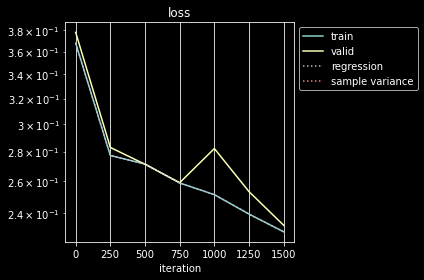

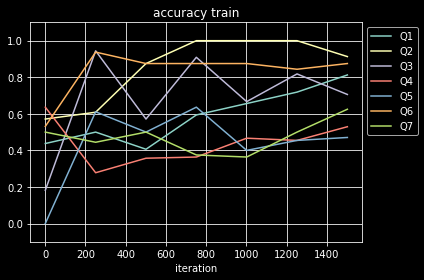

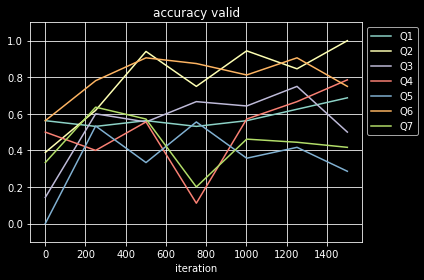

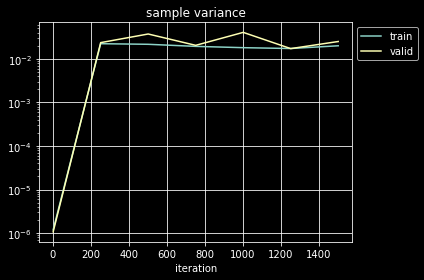

epoch 1:   1%|          | 20/1731 [00:06<11:48,  2.41it/s]

target		 tensor([0.6740, 0.3090, 0.0170, 0.0000, 0.3090, 0.0000, 0.3090, 0.0000, 0.3090,
        0.0000, 0.1330, 0.0000, 0.1760, 0.1790, 0.8210, 0.2310, 0.4430, 0.0000])
prediction	 tensor([0.1150, 0.7290, 0.0180, 0.0030, 0.7310, 0.0330, 0.6110, 0.0590, 0.0590,
        0.0180, 0.0530, 0.0490, 0.0160, 0.0620, 0.2950, 0.0490, 0.0600, 0.0220])
target		 tensor([0.0180, 0.9770, 0.0040, 0.0000, 0.9770, 0.6450, 0.3320, 0.9520, 0.0250,
        0.0000, 0.3600, 0.6180, 0.0000, 0.6970, 0.3030, 0.0060, 0.0120, 0.0000])
prediction	 tensor([0.1260, 0.7990, 0.0190, 0.0050, 0.8680, 0.0360, 0.7900, 0.0660, 0.0650,
        0.0200, 0.0590, 0.0540, 0.0170, 0.0690, 0.2360, 0.0540, 0.0660, 0.0240])
target		 tensor([0.7270, 0.2500, 0.0230, 0.0460, 0.2040, 0.1140, 0.0910, 0.0230, 0.1820,
        0.0230, 0.0450, 0.0910, 0.0450, 0.5580, 0.4420, 0.2500, 0.4770, 0.0000])
prediction	 tensor([0.1240, 0.7890, 0.0190, 0.0040, 0.8330, 0.0350, 0.6850, 0.0640, 0.0640,
        0.0200, 0.0570, 0.0530, 0.0170, 0.0670, 0.18

epoch 1:  16%|█▌        | 270/1731 [01:37<09:56,  2.45it/s]

target		 tensor([0.0340, 0.9660, 0.0000, 0.0170, 0.9490, 0.0330, 0.9160, 0.7270, 0.2220,
        0.0440, 0.6300, 0.1650, 0.1110, 0.4940, 0.5060, 0.0190, 0.0150, 0.0000])
prediction	 tensor([0.1740, 0.9520, 0.0180, 0.0050, 1.1090, 0.0470, 0.7000, 0.0880, 0.0900,
        0.0240, 0.0780, 0.0730, 0.0230, 0.0940, 0.7050, 0.0750, 0.0890, 0.0290])
target		 tensor([0.8230, 0.1770, 0.0000, 0.0000, 0.1770, 0.0660, 0.1110, 0.1310, 0.0460,
        0.0000, 0.1200, 0.0350, 0.0230, 0.0890, 0.9110, 0.2460, 0.5770, 0.0000])
prediction	 tensor([0.1770, 0.4420, 0.0180, 0.0030, 0.4590, 0.0440, 0.2860, 0.0830, 0.0880,
        0.0240, 0.0740, 0.0720, 0.0230, 0.0920, 0.9760, 0.0780, 0.0900, 0.0300])
target		 tensor([0.0200, 0.9800, 0.0000, 0.2080, 0.7720, 0.3150, 0.4570, 0.7220, 0.0500,
        0.2170, 0.4810, 0.0740, 0.0000, 0.0710, 0.9290, 0.0000, 0.0080, 0.0120])
prediction	 tensor([0.0770, 0.7940, 0.0070, 0.7710, 0.1820, 0.0190, 0.1010, 0.0370, 0.0400,
        0.0110, 0.0340, 0.0320, 0.0100, 0.0420, 0.96

epoch 1:  30%|███       | 520/1731 [03:00<08:10,  2.47it/s]

target		 tensor([0.7990, 0.1560, 0.0450, 0.0220, 0.1340, 0.0000, 0.1340, 0.0000, 0.1340,
        0.0000, 0.0220, 0.0890, 0.0220, 0.2090, 0.7910, 0.7990, 0.0000, 0.0000])
prediction	 tensor([0.1620, 0.4800, 0.0160, 0.0380, 0.4170, 0.0370, 0.2390, 0.0730, 0.0800,
        0.0200, 0.0650, 0.0670, 0.0170, 0.0830, 0.7120, 0.0700, 0.0810, 0.0230])
target		 tensor([0.4030, 0.5540, 0.0420, 0.2790, 0.2750, 0.2190, 0.0560, 0.1570, 0.1180,
        0.0000, 0.1790, 0.0960, 0.0000, 0.0650, 0.9350, 0.0000, 0.3330, 0.0700])
prediction	 tensor([2.0800e-01, 2.6400e-01, 2.1000e-02, 1.0000e-03, 1.6700e-01, 4.5000e-02,
        8.0000e-03, 8.9000e-02, 1.0000e-01, 2.3000e-02, 7.9000e-02, 8.3000e-02,
        2.2000e-02, 1.0400e-01, 1.2280e+00, 9.2000e-02, 1.0300e-01, 3.0000e-02])
target		 tensor([0.4070, 0.5830, 0.0090, 0.0450, 0.5390, 0.1120, 0.4270, 0.4440, 0.0950,
        0.0000, 0.0710, 0.3710, 0.0960, 0.1600, 0.8400, 0.0880, 0.3200, 0.0000])
prediction	 tensor([0.3440, 0.1100, 0.0370, 0.0280, 0.0910, 0.04

epoch 1:  44%|████▍     | 770/1731 [04:24<06:29,  2.47it/s]

target		 tensor([0.5180, 0.4470, 0.0350, 0.0000, 0.4470, 0.1900, 0.2570, 0.0000, 0.4470,
        0.0000, 0.0000, 0.3830, 0.0640, 0.0380, 0.9620, 0.2770, 0.2310, 0.0110])
prediction	 tensor([0.2510, 0.5100, 0.0250, 0.0030, 0.5750, 0.0570, 0.3190, 0.1120, 0.1240,
        0.0270, 0.0980, 0.1000, 0.0260, 0.1260, 1.0480, 0.1110, 0.1230, 0.0330])
target		 tensor([0.1260, 0.8740, 0.0000, 0.0540, 0.8200, 0.0000, 0.8200, 0.7760, 0.0440,
        0.1460, 0.0000, 0.2750, 0.3990, 0.2370, 0.7630, 0.0230, 0.1030, 0.0000])
prediction	 tensor([0.2220, 0.8580, 0.0220, 0.0030, 0.9450, 0.0540, 0.6340, 0.1060, 0.1130,
        0.0250, 0.0910, 0.0910, 0.0240, 0.1160, 0.9910, 0.0970, 0.1090, 0.0290])
target		 tensor([0.0000, 0.9720, 0.0280, 0.0000, 0.9720, 0.7960, 0.1760, 0.5440, 0.4280,
        0.0780, 0.5530, 0.2590, 0.0820, 0.3720, 0.6280, 0.0000, 0.0000, 0.0000])
prediction	 tensor([0.2270, 1.2280, 0.0230, 0.0040, 1.3380, 0.0580, 0.9120, 0.1150, 0.1180,
        0.0270, 0.0980, 0.0960, 0.0240, 0.1210, 0.81

epoch 1:  59%|█████▉    | 1020/1731 [05:48<04:51,  2.44it/s]

target		 tensor([0.2340, 0.7100, 0.0560, 0.0250, 0.6850, 0.1200, 0.5650, 0.1970, 0.4870,
        0.4080, 0.1890, 0.0000, 0.0880, 0.6760, 0.3240, 0.0340, 0.2010, 0.0000])
prediction	 tensor([0.2150, 0.7170, 0.0190, 0.0010, 0.7950, 0.0500, 0.5230, 0.1050, 0.1100,
        0.0250, 0.0900, 0.0890, 0.0220, 0.1140, 0.8020, 0.0940, 0.1050, 0.0260])
target		 tensor([0.8420, 0.0740, 0.0840, 0.0000, 0.0740, 0.0000, 0.0740, 0.0000, 0.0740,
        0.0000, 0.0000, 0.0000, 0.0740, 0.0440, 0.9560, 0.5710, 0.2710, 0.0000])
prediction	 tensor([0.3960, 0.2370, 0.1180, 0.0430, 0.1970, 0.0400, 0.1650, 0.1670, 0.1240,
        0.1600, 0.0600, 0.0770, 0.0540, 0.1350, 0.4860, 0.1490, 0.2110, 0.0760])
target		 tensor([0.7070, 0.2460, 0.0460, 0.0530, 0.1930, 0.0000, 0.1930, 0.0000, 0.1930,
        0.0000, 0.0000, 0.0480, 0.1450, 0.1170, 0.8830, 0.0000, 0.5060, 0.2010])
prediction	 tensor([0.5610, 0.2810, 0.1980, 0.0470, 0.2320, 0.0740, 0.2040, 0.2710, 0.1920,
        0.2380, 0.0750, 0.1250, 0.1210, 0.2360, 0.60

epoch 1:  73%|███████▎  | 1270/1731 [07:13<03:08,  2.45it/s]

target		 tensor([0.0000, 0.9990, 0.0010, 0.1150, 0.8840, 0.1430, 0.7410, 0.8840, 0.0000,
        0.0280, 0.5970, 0.2580, 0.0000, 0.0570, 0.9430, 0.0000, 0.0000, 0.0000])
prediction	 tensor([0.2090, 0.8240, 0.0160, 0.0010, 0.8890, 0.0530, 0.7020, 0.1100, 0.1120,
        0.0220, 0.0920, 0.0920, 0.0200, 0.1160, 0.7590, 0.0910, 0.1020, 0.0210])
target		 tensor([0.2640, 0.7360, 0.0000, 0.0000, 0.7360, 0.0000, 0.7360, 0.3270, 0.4090,
        0.0300, 0.2700, 0.4370, 0.0000, 0.8110, 0.1890, 0.0910, 0.1730, 0.0000])
prediction	 tensor([0.2190, 0.7960, 0.0170, 0.0020, 0.8870, 0.0550, 0.6860, 0.1140, 0.1170,
        0.0220, 0.0960, 0.0960, 0.0210, 0.1210, 0.7050, 0.0960, 0.1060, 0.0220])
target		 tensor([0.6020, 0.3710, 0.0270, 0.0000, 0.3710, 0.0000, 0.3710, 0.0710, 0.3000,
        0.0000, 0.3710, 0.0000, 0.0000, 0.0330, 0.9670, 0.5350, 0.0660, 0.0000])
prediction	 tensor([0.2440, 0.4410, 0.0190, 0.0030, 0.5420, 0.0570, 0.4840, 0.1180, 0.1260,
        0.0230, 0.1000, 0.1020, 0.0230, 0.1290, 0.90

epoch 1:  88%|████████▊ | 1520/1731 [08:37<01:25,  2.47it/s]

target		 tensor([0.2730, 0.7050, 0.0220, 0.4060, 0.2990, 0.0000, 0.2990, 0.0000, 0.2990,
        0.0000, 0.0630, 0.2360, 0.0000, 0.2010, 0.7990, 0.0000, 0.0360, 0.2370])
prediction	 tensor([0.1250, 0.8210, 0.0110, 0.5270, 0.3870, 0.0300, 0.2820, 0.0640, 0.0670,
        0.0140, 0.0550, 0.0550, 0.0120, 0.0690, 0.7840, 0.0540, 0.0600, 0.0140])
target		 tensor([0.0470, 0.9470, 0.0060, 0.0180, 0.9280, 0.3120, 0.6160, 0.5050, 0.4230,
        0.0190, 0.2200, 0.6100, 0.0790, 0.6610, 0.3390, 0.0070, 0.0320, 0.0070])
prediction	 tensor([0.1490, 0.8080, 0.0130, 0.4110, 0.4620, 0.0360, 0.3460, 0.0770, 0.0800,
        0.0170, 0.0650, 0.0650, 0.0140, 0.0820, 0.7720, 0.0650, 0.0720, 0.0160])
target		 tensor([0.5670, 0.4220, 0.0110, 0.0520, 0.3700, 0.2790, 0.0900, 0.0000, 0.3700,
        0.0000, 0.1900, 0.1800, 0.0000, 0.5270, 0.4730, 0.0000, 0.1790, 0.3880])
prediction	 tensor([0.4370, 0.3140, 0.2350, 0.1280, 0.2660, 0.0570, 0.2100, 0.1170, 0.0800,
        0.1360, 0.1490, 0.1040, 0.1510, 0.1060, 0.67

epoch 1: 100%|██████████| 1731/1731 [09:48<00:00,  2.94it/s]


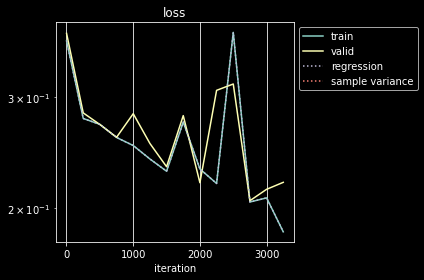

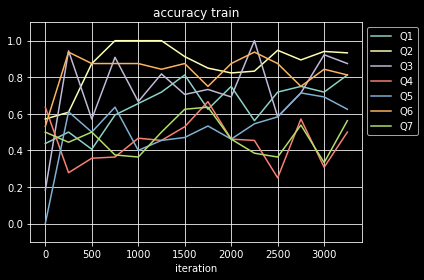

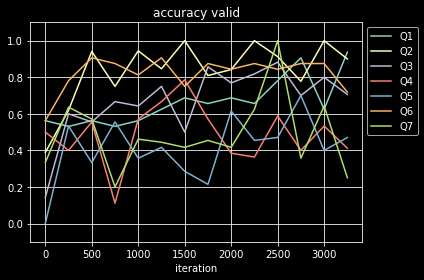

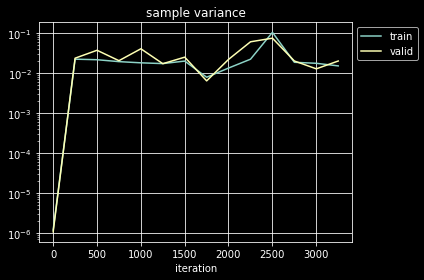

epoch 2:   2%|▏         | 39/1731 [00:12<11:03,  2.55it/s]

target		 tensor([0.0000, 1.0000, 0.0000, 0.0210, 0.9790, 0.8970, 0.0820, 0.9790, 0.0000,
        0.0410, 0.4320, 0.5060, 0.0000, 0.0620, 0.9380, 0.0000, 0.0000, 0.0000])
prediction	 tensor([0.5190, 0.3930, 0.0880, 0.1540, 0.2390, 0.0650, 0.1740, 0.0710, 0.1680,
        0.0560, 0.0660, 0.0570, 0.0590, 0.1340, 0.8660, 0.1930, 0.2520, 0.0740])
target		 tensor([0.7280, 0.2320, 0.0400, 0.0000, 0.2320, 0.0000, 0.2320, 0.0000, 0.2320,
        0.0000, 0.0890, 0.1430, 0.0000, 0.2610, 0.7390, 0.2510, 0.4770, 0.0000])
prediction	 tensor([0.4260, 0.4670, 0.1070, 0.1660, 0.3010, 0.0560, 0.2460, 0.0290, 0.2730,
        0.0880, 0.0640, 0.0490, 0.1010, 0.0300, 0.9700, 0.1450, 0.1880, 0.0930])
target		 tensor([0.4580, 0.5080, 0.0340, 0.0000, 0.5080, 0.0000, 0.5080, 0.0000, 0.5080,
        0.0000, 0.0780, 0.3890, 0.0410, 0.3940, 0.6060, 0.1770, 0.2810, 0.0000])
prediction	 tensor([0.5310, 0.3840, 0.0850, 0.1500, 0.2340, 0.0650, 0.1700, 0.0700, 0.1640,
        0.0540, 0.0650, 0.0580, 0.0580, 0.1450, 0.85

epoch 2:  17%|█▋        | 289/1731 [01:35<10:02,  2.39it/s]

target		 tensor([0.4810, 0.5190, 0.0000, 0.0000, 0.5190, 0.2670, 0.2520, 0.4640, 0.0550,
        0.0000, 0.1930, 0.3110, 0.0150, 0.5290, 0.4710, 0.0970, 0.3840, 0.0000])
prediction	 tensor([0.1180, 0.7350, 0.1470, 0.1200, 0.6160, 0.0890, 0.5260, 0.3600, 0.2550,
        0.0500, 0.3000, 0.2130, 0.0520, 0.2080, 0.7920, 0.0360, 0.0590, 0.0220])
target		 tensor([0.0230, 0.9770, 0.0000, 0.0200, 0.9570, 0.6770, 0.2800, 0.9410, 0.0150,
        0.0000, 0.4170, 0.4820, 0.0570, 0.2450, 0.7550, 0.0000, 0.0230, 0.0000])
prediction	 tensor([0.1160, 0.7380, 0.1450, 0.1180, 0.6200, 0.0930, 0.5280, 0.3640, 0.2570,
        0.0550, 0.3010, 0.2120, 0.0520, 0.2060, 0.7940, 0.0360, 0.0590, 0.0210])
target		 tensor([0.4430, 0.5420, 0.0150, 0.2770, 0.2650, 0.0980, 0.1670, 0.0990, 0.1660,
        0.0340, 0.2100, 0.0210, 0.0000, 0.0830, 0.9170, 0.0000, 0.0000, 0.4430])
prediction	 tensor([0.3310, 0.5500, 0.1190, 0.1220, 0.4280, 0.0470, 0.3810, 0.1400, 0.2880,
        0.0240, 0.1840, 0.1800, 0.0400, 0.1260, 0.87

epoch 2:  31%|███       | 539/1731 [03:01<08:25,  2.36it/s]

target		 tensor([0.1790, 0.8210, 0.0000, 0.0000, 0.8210, 0.6730, 0.1480, 0.4180, 0.4030,
        0.0000, 0.1560, 0.6380, 0.0280, 0.1970, 0.8030, 0.1630, 0.0160, 0.0000])
prediction	 tensor([0.2170, 0.7460, 0.0370, 0.1230, 0.6240, 0.1200, 0.5040, 0.4090, 0.2150,
        0.0490, 0.3010, 0.2320, 0.0420, 0.3030, 0.6970, 0.0510, 0.1070, 0.0600])
target		 tensor([0.3630, 0.6370, 0.0000, 0.5880, 0.0480, 0.0480, 0.0000, 0.0480, 0.0000,
        0.0000, 0.0480, 0.0000, 0.0000, 0.1840, 0.8160, 0.0000, 0.0210, 0.3420])
prediction	 tensor([0.3640, 0.5710, 0.0650, 0.2210, 0.3500, 0.0340, 0.3160, 0.1340, 0.2160,
        0.0240, 0.1380, 0.1570, 0.0320, 0.1140, 0.8860, 0.1120, 0.1780, 0.0740])
target		 tensor([0.9400, 0.0000, 0.0600, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0310, 0.9690, 0.7550, 0.1850, 0.0000])
prediction	 tensor([0.6730, 0.2720, 0.0550, 0.1070, 0.1640, 0.0170, 0.1470, 0.0320, 0.1330,
        0.0150, 0.0480, 0.0820, 0.0190, 0.0550, 0.94

epoch 2:  46%|████▌     | 789/1731 [04:28<06:35,  2.38it/s]

target		 tensor([0.2810, 0.7110, 0.0080, 0.0280, 0.6830, 0.5100, 0.1730, 0.0000, 0.6830,
        0.0000, 0.0790, 0.5540, 0.0500, 0.1330, 0.8670, 0.0100, 0.2270, 0.0440])
prediction	 tensor([0.4050, 0.5280, 0.0670, 0.0790, 0.4490, 0.0560, 0.3940, 0.1450, 0.3040,
        0.0280, 0.1670, 0.2060, 0.0490, 0.1700, 0.8300, 0.1580, 0.1970, 0.0500])
target		 tensor([0.5470, 0.4280, 0.0250, 0.0000, 0.4280, 0.0000, 0.4280, 0.0000, 0.4280,
        0.0000, 0.4280, 0.0000, 0.0000, 0.0000, 1.0000, 0.3350, 0.2130, 0.0000])
prediction	 tensor([0.3960, 0.5340, 0.0700, 0.0680, 0.4660, 0.0650, 0.4010, 0.1650, 0.3010,
        0.0300, 0.1770, 0.2090, 0.0490, 0.1880, 0.8120, 0.1530, 0.1930, 0.0500])
target		 tensor([0.1960, 0.7000, 0.1030, 0.0440, 0.6570, 0.0000, 0.6570, 0.0480, 0.6090,
        0.5310, 0.1260, 0.0000, 0.0000, 0.8130, 0.1870, 0.0000, 0.1380, 0.0580])
prediction	 tensor([0.1040, 0.7950, 0.1000, 0.1260, 0.6690, 0.1450, 0.5240, 0.4490, 0.2200,
        0.0480, 0.3210, 0.2400, 0.0610, 0.2980, 0.70

epoch 2:  60%|██████    | 1039/1731 [05:55<04:48,  2.40it/s]

target		 tensor([0.3310, 0.6580, 0.0110, 0.1470, 0.5110, 0.1150, 0.3960, 0.1360, 0.3750,
        0.0000, 0.1330, 0.3780, 0.0000, 0.1630, 0.8370, 0.0130, 0.2800, 0.0380])
prediction	 tensor([0.2600, 0.6820, 0.0590, 0.0850, 0.5960, 0.0980, 0.4990, 0.2850, 0.3120,
        0.0400, 0.2690, 0.2490, 0.0390, 0.2340, 0.7660, 0.0830, 0.1330, 0.0440])
target		 tensor([0.7690, 0.1260, 0.1040, 0.0000, 0.1260, 0.0000, 0.1260, 0.0000, 0.1260,
        0.0000, 0.0000, 0.1260, 0.0000, 0.1280, 0.8720, 0.6860, 0.0840, 0.0000])
prediction	 tensor([0.7220, 0.2400, 0.0380, 0.0450, 0.1950, 0.0200, 0.1750, 0.0470, 0.1490,
        0.0160, 0.0620, 0.0960, 0.0210, 0.1660, 0.8340, 0.3750, 0.3230, 0.0230])
target		 tensor([0.2940, 0.6770, 0.0290, 0.0000, 0.6770, 0.1110, 0.5650, 0.0540, 0.6220,
        0.0620, 0.0000, 0.5290, 0.0860, 0.3630, 0.6370, 0.0170, 0.2550, 0.0220])
prediction	 tensor([0.0160, 0.9140, 0.0690, 0.1050, 0.8090, 0.2050, 0.6040, 0.6610, 0.1480,
        0.0580, 0.4300, 0.2870, 0.0350, 0.3320, 0.66

epoch 2:  74%|███████▍  | 1288/1731 [07:32<03:02,  2.42it/s]

target		 tensor([0.3460, 0.6320, 0.0230, 0.0350, 0.5960, 0.2120, 0.3840, 0.5370, 0.0590,
        0.0000, 0.1190, 0.4060, 0.0710, 0.1470, 0.8530, 0.0000, 0.3380, 0.0070])
prediction	 tensor([0.0950, 0.8560, 0.0490, 0.0760, 0.7800, 0.1940, 0.5860, 0.5810, 0.1990,
        0.0440, 0.3870, 0.2770, 0.0720, 0.3250, 0.6750, 0.0170, 0.0550, 0.0230])
target		 tensor([0.1340, 0.8620, 0.0050, 0.0580, 0.8030, 0.0490, 0.7550, 0.5450, 0.2580,
        0.1330, 0.3970, 0.0000, 0.2730, 0.2030, 0.7970, 0.0140, 0.0820, 0.0380])
prediction	 tensor([0.0130, 0.9260, 0.0610, 0.2940, 0.6320, 0.1690, 0.4640, 0.4990, 0.1340,
        0.0520, 0.3080, 0.2030, 0.0700, 0.2600, 0.7400, 0.0110, 0.0010, 0.0010])
target		 tensor([0.9490, 0.0400, 0.0120, 0.0000, 0.0400, 0.0000, 0.0400, 0.0000, 0.0400,
        0.0000, 0.0000, 0.0400, 0.0000, 0.4820, 0.5180, 0.4160, 0.5330, 0.0000])
prediction	 tensor([0.5150, 0.4370, 0.0480, 0.0770, 0.3600, 0.1260, 0.2330, 0.1590, 0.2010,
        0.0300, 0.1400, 0.1530, 0.0360, 0.3960, 0.60

epoch 2:  89%|████████▉ | 1539/1731 [09:10<01:20,  2.38it/s]

target		 tensor([0.0000, 1.0000, 0.0000, 0.0290, 0.9710, 0.3920, 0.5790, 0.8960, 0.0750,
        0.0970, 0.6840, 0.1420, 0.0490, 0.4800, 0.5200, 0.0000, 0.0000, 0.0000])
prediction	 tensor([0.0850, 0.8740, 0.0410, 0.0380, 0.8350, 0.2410, 0.5940, 0.6810, 0.1550,
        0.0470, 0.4290, 0.3250, 0.0340, 0.3840, 0.6160, 0.0120, 0.0500, 0.0230])
target		 tensor([0.5920, 0.3730, 0.0350, 0.0000, 0.3730, 0.0820, 0.2910, 0.1380, 0.2350,
        0.1230, 0.2500, 0.0000, 0.0000, 0.1310, 0.8690, 0.0840, 0.5080, 0.0000])
prediction	 tensor([0.6260, 0.3400, 0.0340, 0.0220, 0.3180, 0.0220, 0.2950, 0.0700, 0.2480,
        0.0250, 0.1100, 0.1530, 0.0290, 0.1120, 0.8880, 0.3140, 0.2990, 0.0130])
target		 tensor([0.0580, 0.9420, 0.0000, 0.0000, 0.9420, 0.0170, 0.9250, 0.8450, 0.0970,
        0.2620, 0.6440, 0.0360, 0.0000, 0.1130, 0.8870, 0.0210, 0.0370, 0.0000])
prediction	 tensor([0.4680, 0.4930, 0.0390, 0.0190, 0.4740, 0.0810, 0.3940, 0.1840, 0.2900,
        0.0360, 0.1940, 0.2090, 0.0350, 0.2520, 0.74

epoch 2: 100%|██████████| 1731/1731 [10:16<00:00,  2.81it/s]


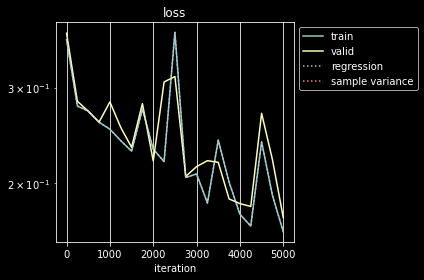

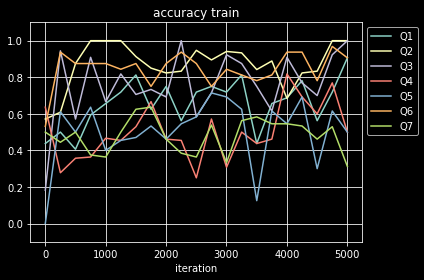

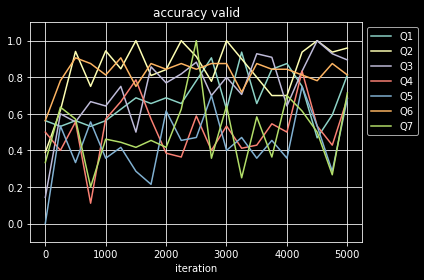

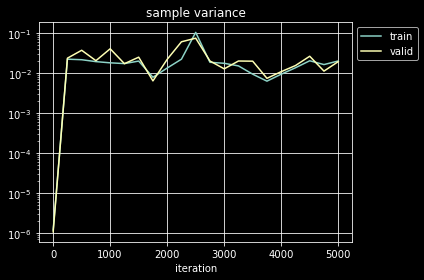

epoch 3:   3%|▎         | 58/1731 [00:19<10:56,  2.55it/s]

target		 tensor([0.1310, 0.8630, 0.0060, 0.0000, 0.8630, 0.7730, 0.0890, 0.3950, 0.4680,
        0.0000, 0.1930, 0.6240, 0.0460, 0.2660, 0.7340, 0.0720, 0.0600, 0.0000])
prediction	 tensor([0.2710, 0.6740, 0.0560, 0.0300, 0.6430, 0.1300, 0.5140, 0.3180, 0.3260,
        0.0450, 0.2970, 0.2600, 0.0410, 0.2600, 0.7400, 0.0880, 0.1610, 0.0220])
target		 tensor([0.5490, 0.4400, 0.0110, 0.0150, 0.4250, 0.0000, 0.4250, 0.0000, 0.4250,
        0.0000, 0.4250, 0.0000, 0.0000, 0.3280, 0.6720, 0.0370, 0.5120, 0.0000])
prediction	 tensor([0.6800, 0.2730, 0.0470, 0.0270, 0.2460, 0.0360, 0.2100, 0.0470, 0.1980,
        0.0220, 0.0790, 0.1200, 0.0250, 0.1420, 0.8580, 0.3400, 0.3130, 0.0270])
target		 tensor([0.1900, 0.8100, 0.0000, 0.5080, 0.3020, 0.2080, 0.0940, 0.0000, 0.3020,
        0.1380, 0.0000, 0.1650, 0.0000, 0.2200, 0.7800, 0.0000, 0.0260, 0.1640])
prediction	 tensor([0.3600, 0.5850, 0.0550, 0.2520, 0.3320, 0.0710, 0.2610, 0.0910, 0.2410,
        0.0400, 0.1260, 0.1320, 0.0340, 0.1530, 0.84

epoch 3:  18%|█▊        | 308/1731 [01:42<09:53,  2.40it/s]

target		 tensor([0.2420, 0.7580, 0.0000, 0.5030, 0.2550, 0.1960, 0.0590, 0.1310, 0.1240,
        0.0740, 0.0000, 0.0000, 0.1810, 0.3080, 0.6920, 0.0000, 0.0240, 0.2180])
prediction	 tensor([0.3270, 0.6010, 0.0720, 0.5610, 0.0400, 0.0100, 0.0300, 0.0080, 0.0330,
        0.0070, 0.0140, 0.0130, 0.0060, 0.0790, 0.9210, 0.0270, 0.0920, 0.2070])
target		 tensor([0.7790, 0.1610, 0.0600, 0.0000, 0.1610, 0.0000, 0.1610, 0.1320, 0.0300,
        0.0000, 0.1100, 0.0000, 0.0510, 0.2420, 0.7580, 0.7420, 0.0370, 0.0000])
prediction	 tensor([0.8070, 0.1600, 0.0330, 0.0550, 0.1050, 0.0080, 0.0970, 0.0150, 0.0890,
        0.0110, 0.0300, 0.0520, 0.0130, 0.0580, 0.9420, 0.3960, 0.3250, 0.0860])
target		 tensor([0.8770, 0.0930, 0.0300, 0.0000, 0.0930, 0.0000, 0.0930, 0.0810, 0.0120,
        0.0460, 0.0460, 0.0000, 0.0000, 0.0830, 0.9170, 0.8520, 0.0250, 0.0000])
prediction	 tensor([0.7390, 0.2220, 0.0390, 0.1230, 0.0990, 0.0070, 0.0920, 0.0080, 0.0910,
        0.0120, 0.0270, 0.0470, 0.0130, 0.5530, 0.44

epoch 3:  32%|███▏      | 558/1731 [03:08<08:17,  2.36it/s]

target		 tensor([0.5580, 0.4070, 0.0350, 0.0580, 0.3490, 0.0000, 0.3490, 0.1200, 0.2290,
        0.0800, 0.0960, 0.1720, 0.0000, 0.1620, 0.8380, 0.0000, 0.5450, 0.0130])
prediction	 tensor([0.5310, 0.4120, 0.0570, 0.3120, 0.1000, 0.0180, 0.0820, 0.0130, 0.0880,
        0.0160, 0.0320, 0.0380, 0.0140, 0.0520, 0.9480, 0.1260, 0.1870, 0.2170])
target		 tensor([0.3450, 0.6510, 0.0040, 0.0000, 0.6510, 0.0000, 0.6510, 0.4440, 0.2080,
        0.0000, 0.2530, 0.3980, 0.0000, 0.0000, 1.0000, 0.1470, 0.1980, 0.0000])
prediction	 tensor([0.4680, 0.4930, 0.0400, 0.0800, 0.4130, 0.0460, 0.3670, 0.1000, 0.3120,
        0.0320, 0.1610, 0.1830, 0.0360, 0.0580, 0.9420, 0.1760, 0.2420, 0.0490])
target		 tensor([0.8180, 0.1520, 0.0300, 0.0000, 0.1520, 0.0000, 0.1520, 0.0000, 0.1520,
        0.0000, 0.0610, 0.0910, 0.0000, 0.5310, 0.4690, 0.5460, 0.2720, 0.0000])
prediction	 tensor([0.8230, 0.1390, 0.0380, 0.0520, 0.0860, 0.0150, 0.0710, 0.0210, 0.0650,
        0.0090, 0.0260, 0.0400, 0.0100, 0.2370, 0.76

epoch 3:  47%|████▋     | 808/1731 [04:35<06:28,  2.38it/s]

target		 tensor([0.5000, 0.4730, 0.0270, 0.1490, 0.3240, 0.0450, 0.2790, 0.1620, 0.1620,
        0.0440, 0.2800, 0.0000, 0.0000, 0.3230, 0.6770, 0.0000, 0.3490, 0.1520])
prediction	 tensor([0.2010, 0.7800, 0.0190, 0.1410, 0.6400, 0.2100, 0.4300, 0.3870, 0.2520,
        0.0580, 0.2870, 0.2540, 0.0400, 0.4440, 0.5560, 0.0340, 0.1170, 0.0500])
target		 tensor([0.8750, 0.0500, 0.0750, 0.0000, 0.0500, 0.0000, 0.0500, 0.0000, 0.0500,
        0.0000, 0.0000, 0.0500, 0.0000, 0.0540, 0.9460, 0.5250, 0.3500, 0.0000])
prediction	 tensor([0.7740, 0.2060, 0.0200, 0.0290, 0.1770, 0.0200, 0.1580, 0.0350, 0.1430,
        0.0160, 0.0550, 0.0880, 0.0190, 0.1500, 0.8500, 0.3950, 0.3410, 0.0370])
target		 tensor([0.6520, 0.2770, 0.0700, 0.0000, 0.2770, 0.0000, 0.2770, 0.0000, 0.2770,
        0.0000, 0.0560, 0.1720, 0.0490, 0.0730, 0.9270, 0.4910, 0.1610, 0.0000])
prediction	 tensor([0.4890, 0.4940, 0.0180, 0.0560, 0.4370, 0.0900, 0.3480, 0.1460, 0.2910,
        0.0330, 0.1700, 0.1980, 0.0360, 0.2560, 0.74

epoch 3:  61%|██████    | 1058/1731 [06:13<04:42,  2.39it/s]

target		 tensor([0.0800, 0.8950, 0.0240, 0.0230, 0.8720, 0.6740, 0.1980, 0.2960, 0.5760,
        0.0330, 0.3660, 0.4720, 0.0000, 0.4780, 0.5220, 0.0000, 0.0800, 0.0000])
prediction	 tensor([0.0350, 0.9280, 0.0370, 0.0730, 0.8550, 0.2800, 0.5750, 0.7260, 0.1290,
        0.0590, 0.4270, 0.3180, 0.0510, 0.4550, 0.5450, 0.0050, 0.0230, 0.0080])
target		 tensor([0.0860, 0.9140, 0.0000, 0.0000, 0.9140, 0.4330, 0.4810, 0.8900, 0.0240,
        0.0720, 0.5770, 0.2160, 0.0480, 0.2660, 0.7340, 0.0860, 0.0000, 0.0000])
prediction	 tensor([0.0370, 0.9280, 0.0360, 0.0730, 0.8550, 0.2880, 0.5670, 0.7210, 0.1340,
        0.0570, 0.4230, 0.3240, 0.0510, 0.4700, 0.5300, 0.0050, 0.0230, 0.0080])
target		 tensor([0.5240, 0.4740, 0.0020, 0.2590, 0.2140, 0.0000, 0.2140, 0.0930, 0.1210,
        0.2140, 0.0000, 0.0000, 0.0000, 0.0400, 0.9600, 0.0000, 0.0000, 0.5240])
prediction	 tensor([0.2540, 0.6940, 0.0510, 0.5040, 0.1910, 0.0490, 0.1420, 0.0710, 0.1190,
        0.0350, 0.0800, 0.0530, 0.0220, 0.1720, 0.82

epoch 3:  76%|███████▌  | 1308/1731 [07:39<02:58,  2.37it/s]

target		 tensor([0.8800, 0.1200, 0.0000, 0.0400, 0.0800, 0.0000, 0.0800, 0.0000, 0.0800,
        0.0000, 0.0370, 0.0430, 0.0000, 0.1490, 0.8510, 0.5450, 0.3350, 0.0000])
prediction	 tensor([0.5340, 0.4240, 0.0420, 0.0400, 0.3850, 0.0760, 0.3090, 0.1280, 0.2560,
        0.0300, 0.1350, 0.1840, 0.0360, 0.3320, 0.6680, 0.2480, 0.2760, 0.0110])
target		 tensor([0.2500, 0.7490, 0.0010, 0.6360, 0.1120, 0.0370, 0.0750, 0.0750, 0.0380,
        0.0000, 0.1120, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0050, 0.2450])
prediction	 tensor([0.1230, 0.8290, 0.0480, 0.5710, 0.2580, 0.0780, 0.1800, 0.1480, 0.1090,
        0.0460, 0.1130, 0.0670, 0.0320, 0.2100, 0.7900, 0.0010, 0.0340, 0.0880])
target		 tensor([0.0940, 0.9000, 0.0060, 0.0000, 0.9000, 0.4670, 0.4330, 0.6100, 0.2890,
        0.2030, 0.5330, 0.1640, 0.0000, 0.7580, 0.2420, 0.0000, 0.0940, 0.0000])
prediction	 tensor([0.0250, 0.9260, 0.0490, 0.1050, 0.8210, 0.2320, 0.5890, 0.7160, 0.1050,
        0.0550, 0.4160, 0.2960, 0.0540, 0.4110, 0.58

epoch 3:  90%|█████████ | 1558/1731 [09:06<01:13,  2.36it/s]

target		 tensor([0.2660, 0.7340, 0.0000, 0.0000, 0.7340, 0.1120, 0.6210, 0.5390, 0.1940,
        0.0470, 0.5760, 0.0600, 0.0520, 0.4040, 0.5960, 0.1550, 0.1120, 0.0000])
prediction	 tensor([0.1120, 0.8620, 0.0260, 0.0300, 0.8320, 0.1700, 0.6620, 0.5820, 0.2500,
        0.0570, 0.4780, 0.2730, 0.0230, 0.1870, 0.8130, 0.0230, 0.0760, 0.0130])
target		 tensor([0.7240, 0.2000, 0.0760, 0.0000, 0.2000, 0.0290, 0.1710, 0.0000, 0.2000,
        0.0000, 0.0450, 0.0820, 0.0730, 0.0590, 0.9410, 0.6630, 0.0620, 0.0000])
prediction	 tensor([0.7530, 0.2180, 0.0300, 0.0210, 0.1960, 0.0070, 0.1890, 0.0320, 0.1640,
        0.0170, 0.0580, 0.1010, 0.0210, 0.0230, 0.9770, 0.4190, 0.3080, 0.0260])
target		 tensor([0.8930, 0.0840, 0.0230, 0.0000, 0.0840, 0.0210, 0.0630, 0.0000, 0.0840,
        0.0000, 0.0420, 0.0420, 0.0000, 0.3020, 0.6980, 0.0420, 0.6400, 0.2110])
prediction	 tensor([0.8190, 0.1420, 0.0390, 0.0270, 0.1150, 0.0080, 0.1080, 0.0250, 0.0900,
        0.0120, 0.0340, 0.0570, 0.0120, 0.1940, 0.80

epoch 3:  98%|█████████▊| 1688/1731 [09:53<00:15,  2.84it/s]


KeyboardInterrupt: 

In [5]:

epoch = 1

while epoch < epochs+1:
    ## adjust training according to schedule
    if classifier.epoch in schedule.keys():
        schedule[classifier.epoch]()
    data_loader_train = make_data_loader.get_data_loader_train(batch_size=batch_size) #, num_workers=4)
    data_loader_valid = make_data_loader.get_data_loader_valid(batch_size=batch_size) #, num_workers=4)
    classifier.train_epoch(data_loader_train, data_loader_valid)
    classifier.plot_losses()
    classifier.plot_accuracy()
    classifier.plot_test_accuracy()
    classifier.plot_sample_variances()
    
        


In [ ]:
data_loader_train = make_data_loader.get_data_loader_train(batch_size=batch_size) #, num_workers=4)

torch.autograd.detect_anomaly?

for image, label in data_loader_train:
    print(image.min())
    break


In [ ]:
for label in labels_pred:
    print(label)

In [ ]:
for group, accuracy in accuracies.items():
    if not group in considered_groups:
        continue
    plt.title("accuracy")
    plot_losses(accuracy, test_losses_steps, iteration, label=f"Q{group}")
    plt.ylim(-0.1,1.1)
    plt.show()

In [ ]:
N_aug = 16
N_batch = 3

with torch.no_grad():
    for images, labels in make_data_loader.get_data_loader_train(batch_size=batch_size, num_workers=4):
        images = images.to(device)
        labels = labels.to(device)
        break


imgs = classifier.augment(images)
shp = imgs.shape
print(imgs.shape, images.shape)
imgs = imgs.reshape(N_aug, N_batch,*shp[1:])
imgs = imgs.permute(1,0,2,3,4)
imgs = imgs.reshape(N_aug*N_batch,*shp[1:])
print(imgs.shape)

#for image, l in zip(imgs, classifier(images)):
#    print(l)
for image in imgs:
    plt.imshow(image.permute(1,2,0).cpu())
    plt.show()


In [ ]:
for g in classifier.optimizer.param_groups:
    print(g["lr"])

In [ ]:
with torch.no_grad():
    data_loader_test = make_data_loader.get_data_loader_train(batch_size=batch_size_test, num_workers=4)
    loss = 0
    accs = Counter({group:0 for group in range(1,12)})
    for N_test, (images_test, labels_test) in enumerate(data_loader_test):
        images_test = images_test.to(device)
        labels_test = labels_test.to(device)
        labels_pred = classifier(images_test)
        loss += mse(labels_pred, labels_test).item()
        accs_tmp = measure_accuracy_classifier(labels_pred, labels_test)
        accs.update(Counter(accs_tmp))
        if N_test == N_batches_test:
            break                        
        break
print(accs)
print(accs[1])
for i in range(len(labels_test)):   
    print("predic", labels_pred[i,:3])
    print("target", labels_test[i,:3])
    print("diff  ", labels_test[i,:3] - labels_pred[i,:3])
    
    print()
    

In [ ]:
print(iteration, len(test_losses), test_losses_steps)
plot_losses(losses, losses_steps, iteration, label="training")
plot_losses(test_losses, test_losses_steps, iteration, label="test")
plt.show()
        

In [ ]:
ll = torch.rand(2,37)
make_galaxy_labels_hierarchical(ll)

## Interpretation of sample variance

In [ ]:
N_batch, N_feat = 32, 3
m = torch.rand(1,N_feat)
differences = [0.0001,0.001, 0.01, 0.1, 1]
var = []
for d in differences:
    sample = m + d*torch.randn(N_batch,N_feat)
    var.append(get_sample_variance(sample))
plt.loglog(differences, var)
plt.xlabel("average difference")
plt.ylabel("sample variance")

the sample variance is about the squared average difference: sample variance of $10^{-4}$ refers to mean difference of 1%